In [1]:
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rbf_kernel(x1, x2, varSigma, lengthScale):
    if x2 is None:
        d = cdist(x1, x1)
    else:
        d = cdist(x1, x2)

    K = varSigma * np.exp(-np.power(d, 2)/lengthScale)

    return K

def lin_kernel(x1, x2, varSigma):
    if x2 is None:
        return varSigma * x1.dot(x1.T)
    else:
        return varSigma * x1.dot(x2.T)

def white_kernel(x1, x2, varSigma):
    if x2 is None:
        return varSigma * np.eye(x1.shape[0])
    else:
        return np.zeros((x1.shape[0], x2.shape[0]))

def periodic_kernel(x1, x2, varSigma, period, lengthScale):
    if x2 is None:
        d = cdist(x1, x1)
    else:
        d = cdist(x1, x2)

    return varSigma * np.exp(-(2 * np.sin((np.pi/period) * d)**2)/lengthScale**2)

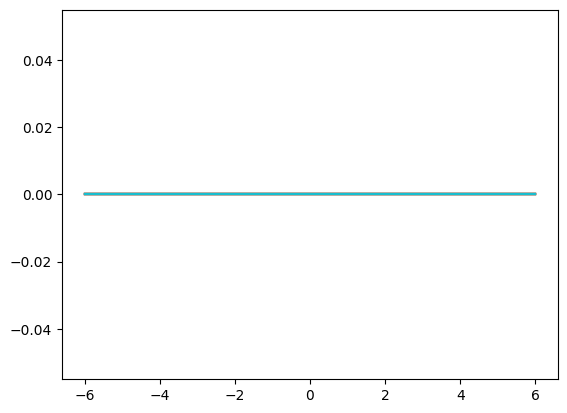

In [3]:
# choose index set for the marginal
x = np.linspace(-6, 6, 200).reshape(-1, 1)
# compute covariance matrix
K = white_kernel(x, x, 3.0)
# create mean vector
mu = np.zeros(x.shape)

# draw 20 samples from Gaussian distribution
f = np.random.multivariate_normal(mu.flatten(), K, 20)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f.T)

plt.show()

In [4]:
N = 5

x = np.linspace(-3.1, 3, N)
y = np.sin(2*np.pi/x) + x*0.1 + 0.3*np.random.randn(x.shape[0])

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

x_star = np.linspace(-6, 6, 500)

In [5]:
def gp_prediction(x1, y1, xstar, varSigma, lengthScale, noise):
    k_starX = rbf_kernel(xstar, x1, varSigma, lengthScale) # noise
    k_xx = rbf_kernel(x1, None, varSigma, lengthScale) # noise
    k_starstar = rbf_kernel(xstar, None, varSigma, lengthScale) # noise

    mu = k_starX.dot(np.linalg.inv(k_xx)).dot(y1)
    var = k_starstar - (k_starX).dot(np.linalg.inv(k_xx)).dot(k_starX.T)

    return mu, var, xstar

In [6]:
Nsamp = 100
mu_star, var_star, x_star = gp_prediction(x, y, x_star, 1.0, 3.0, None)
f_star = np.random.multivariate_normal(mu_star, var_star, Nsamp)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_star, f_star.T)
ax.scatter(x, y, 200, 'k', '*', zorder=2)

ValueError: XA must be a 2-dimensional array.